## UseLIb

In [58]:
import  numpy as np
import  pandas as pd
import  matplotlib.pyplot as plt
import os
import seaborn as sns

## 경로설정

In [4]:
os.chdir('G:\내 드라이브\제주_전기차\data')

In [154]:
# df = pd.read_csv('광고거른거.csv')
# df_keyword = pd.read_csv('관련키워드.csv')
df_news = pd.read_csv('CFI전기차보도자료.csv')

## Use Data

In [11]:
df.head(2)

,제목,내용,유형,조회수,작성날짜,월별,카페명,년별,평가,내용거른거
0,봉고3더블캡,보다 투명하고 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요 거래 지역...,제사모 중고장터,130,2022.03.16.,2022.03,제사모,2022,P,보다 투명하고 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요 거래 지역...
1,렌트카 알아보고 있는데 lpg 차량이 저렴한 이유가 뭘까요?,육지에서 이번주 토욜부터 제주 한달살이 시작하면서 렌트카 알아보고 있어요 육지에선 ...,Q. 종합 질문방,161,2022.03.16.,2022.03,제사모,2022,N,육지에서 이번주 토욜부터 제주 한달살이 시작하면서 렌트카 알아보고 있어요 육지에선 ...


### 데이터 수집기간

In [107]:
df.월별.unique()

array([2022.03, 2022.02, 2022.01, 2021.12, 2021.11, 2021.1 , 2021.09,
       2021.08, 2021.07, 2021.06, 2021.05, 2021.04, 2021.03, 2021.02,
       2021.01, 2020.12, 2020.11, 2020.1 , 2020.09, 2020.08, 2020.07,
       2020.06, 2020.05, 2020.04, 2020.03, 2020.02, 2020.01, 2019.12,
       2019.11, 2019.1 , 2019.09, 2019.08, 2019.07, 2019.06, 2019.05,
       2019.04, 2019.03, 2019.02, 2019.01, 2018.12, 2018.11, 2018.1 ,
       2018.09, 2018.08, 2018.07, 2018.06, 2018.05, 2018.04, 2018.03,
       2018.02, 2018.01, 2017.12, 2017.11, 2017.1 , 2017.09, 2017.08,
       2017.07, 2017.06, 2017.05, 2017.04, 2017.03, 2017.02, 2017.01,
       2016.11, 2016.1 , 2016.09, 2016.08, 2016.07, 2016.05, 2016.04,
       2016.03, 2016.02, 2016.01, 2015.03, 2014.11, 2014.09, 2014.08,
       2014.07, 2014.03, 2012.07, 2011.06, 2010.11, 2010.06, 2016.12,
       2015.12, 2015.11, 2015.1 , 2015.09, 2015.08, 2015.07, 2015.06,
       2015.05, 2015.04, 2014.1 , 2014.06, 2014.04, 2015.01, 2016.06])

## 전기차종별 분석

In [21]:
df.head(1)

,제목,유형,조회수,작성날짜,월별,카페명,년별,평가,내용거른거
0,봉고3더블캡,제사모 중고장터,130,2022.03.16.,2022.03,제사모,2022,P,보다 투명하고 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요 거래 지역...


In [22]:
df.rename(columns={'내용거른거':'내용'},inplace=True)

In [32]:
df  = df.dropna()

In [42]:
df.카페명.value_counts()

전기차동호회(투플럭스)    375088
네이버블로그            8460
전기차동호회            4390
느영나영              3850
제사모               1182
Name: 카페명, dtype: int64

In [44]:
df_jeju = df[df.카페명 != '전기차동호회(투플럭스)']

In [46]:
df_jeju.reset_index(drop=True,inplace=True)

<AxesSubplot:xlabel='년별,평가'>

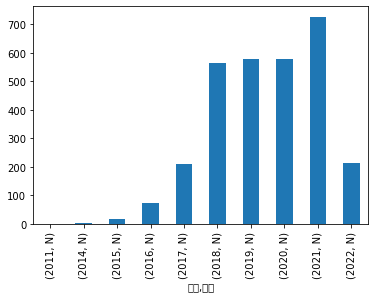

In [55]:
df_jeju.groupby([df_jeju.년별,df_jeju.평가[df_jeju.평가=='N']]).평가.count().plot.bar()

<AxesSubplot:xlabel='년별,평가'>

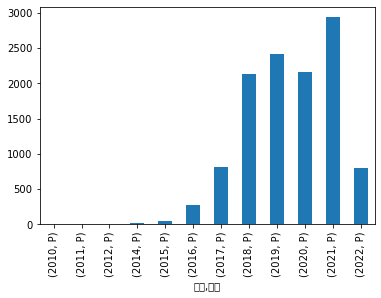

In [56]:
df_jeju.groupby([df_jeju.년별,df_jeju.평가[df_jeju.평가=='P']]).평가.count().plot.bar()

<AxesSubplot:xlabel='년별,평가'>

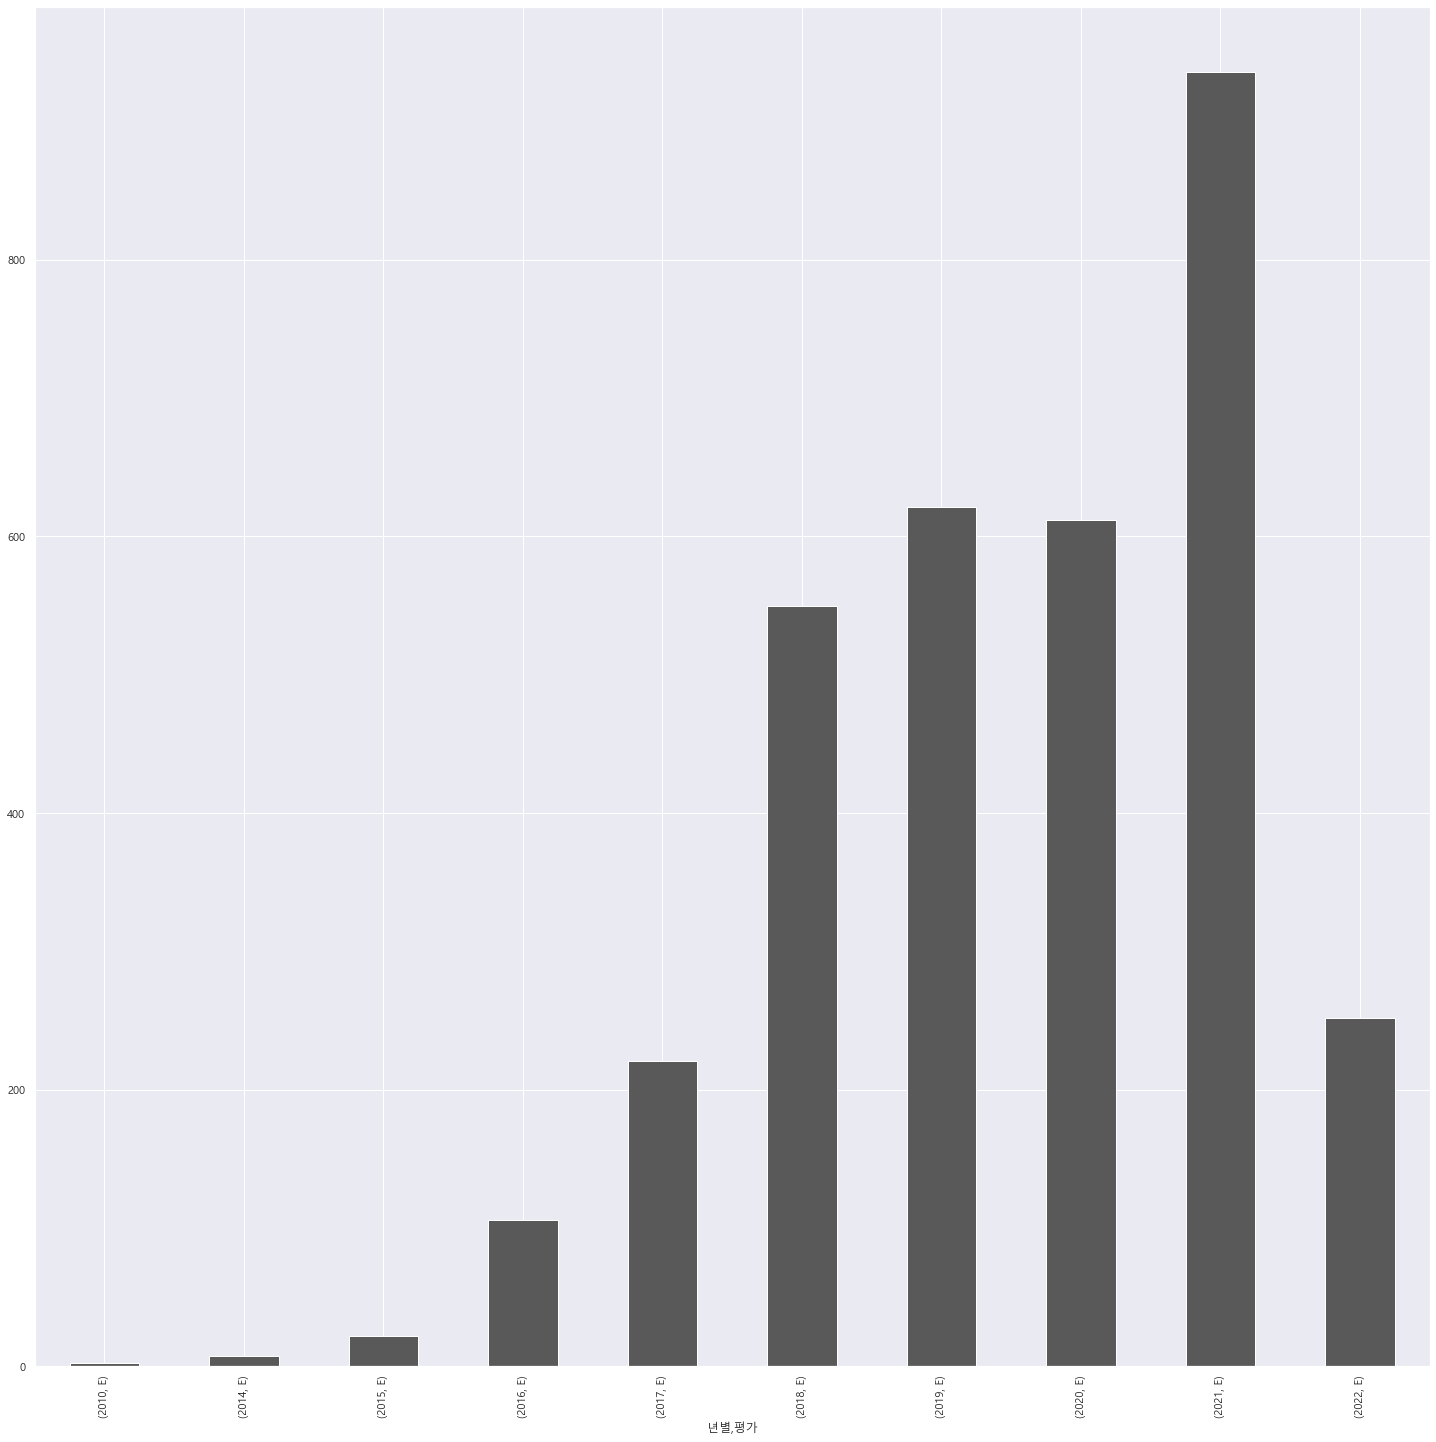

In [73]:
df_jeju.groupby([df_jeju.년별,df_jeju.평가[df_jeju.평가=='E']]).평가.count().plot.bar(color='#595959')

In [88]:
type(df.년별[0])

numpy.int64

In [91]:
df_jeju.년별.value_counts()

2021    4600
2019    3620
2020    3348
2018    3240
2022    1262
2017    1238
2016     454
2015      88
2014      24
2010       4
2012       2
2011       2
Name: 년별, dtype: int64

In [ ]:
df_jeju.내용 in [2022]

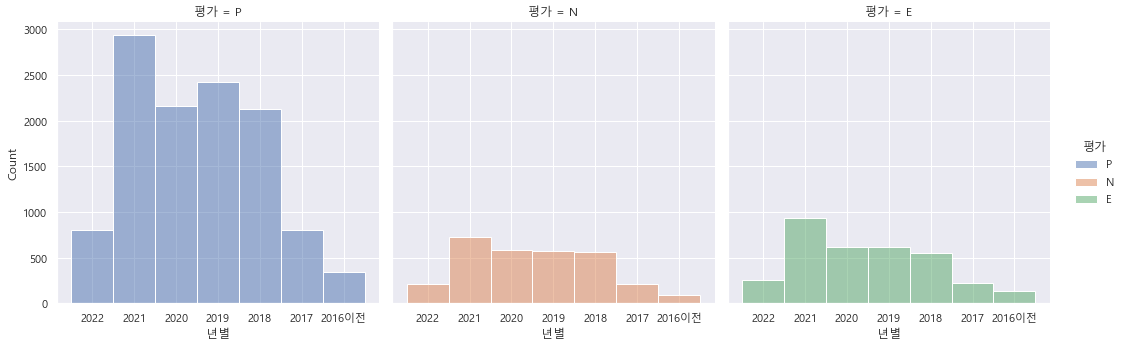

In [102]:
sns.set(rc = {'figure.figsize':(25,25)})
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.displot(data=df_jeju, x="년별",col='평가',hue='평가')

In [ ]:
sns.set(rc = {'figure.figsize':(25,25)})
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.displot(data=df[df.시간대 != '미분류'], x="시간대",col='골프장지역명',hue='시간대')

In [68]:
df.카페명.value_counts()

전기차동호회(투플럭스)    375088
네이버블로그            8460
전기차동호회            4390
느영나영              3850
제사모               1182
Name: 카페명, dtype: int64

In [71]:
df[df.카페명=='네이버블로그'].to_csv('네이버블로그평가')

0          보다 투명하고 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요   거래 지역...
1         육지에서 이번주 토욜부터 제주 한달살이 시작하면서 렌트카 알아보고 있어요 육지에선 ...
3         안에렌터카 무진장 많이 다니던데임산부 노약자 상관없이넘쳐나던디거기다우도내에전기차 렌...
5         월일일 딸명과 엄마까지 총 인 제주여행을 계획중입니다비행기 예약은 끝났고 렌트카를 ...
6         차량 정보  차량번호   차량 번호 참고 연식   주행거리  만킬로 연료  전기 변...
                                ...                        
414153     취소 차 잡다 카 마스터 님 계시다 요 계시다 요 아이오 닉 두다 좋다 지역 울릉 이다
414154    대기 순번 문의 관련 되다 주제 대해 미리 카페 내 검색 하다 보다 네 아니다 네 ...
414156    니 로 회생제동 질문 안녕하다 니 로 중고 로 타고 있다 네비업뎃 하고 나서다 부터...
414157    가입 인사 드리다 자기 소개 안녕하다 기다리다 있다 지역 고양시 한글 별명 뜻 이름...
414158    취소 차 문의 드리다 관련 되다 주제 대해 미리 카페 내 검색 하다 보다 네 아니다...
Name: 내용, Length: 392970, dtype: object

In [ ]:
df_jeju['년별']= df_jeju.년별.apply(lambda x : 2016 if x < 2017 else x)


In [137]:
df_jeju.년별[0][:4]

'2022'

In [138]:
df_jeju['년별']= df_jeju.년별.apply(lambda x : int(x[:4]))

C:\Users\alsdn\AppData\Local\Temp/ipykernel_20576/813171590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jeju['년별']= df_jeju.년별.apply(lambda x : int(x[:4]))


In [140]:
df_jeju.년별.value_counts()

2021    4600
2019    3620
2020    3348
2018    3240
2022    1262
2017    1238
2016     574
Name: 년별, dtype: int64

In [132]:
df_jeju['년별']

0        2022
1        2022
2        2022
3        2022
4        2022
         ... 
17877    2019
17878    2019
17879    2019
17880    2019
17881    2019
Name: 년별, Length: 17882, dtype: object

In [104]:
df['년별'].value_counts()

2021    177165
2020    110542
2019     56993
2022     43218
2018      3240
2017      1238
2016       454
2015        88
2014        24
2010         4
2012         2
2011         2
Name: 년별, dtype: int64

In [110]:
df

,제목,유형,조회수,작성날짜,월별,카페명,년별,평가,내용
0,봉고3더블캡,제사모 중고장터,130,2022.03.16.,2022.03,제사모,2022,P,보다 투명하고 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요 거래 지역...
1,렌트카 알아보고 있는데 lpg 차량이 저렴한 이유가 뭘까요?,Q. 종합 질문방,161,2022.03.16.,2022.03,제사모,2022,N,육지에서 이번주 토욜부터 제주 한달살이 시작하면서 렌트카 알아보고 있어요 육지에선 ...
3,요번에 보니..,실시간 이야기,119,2022.03.15.,2022.03,제사모,2022,E,안에렌터카 무진장 많이 다니던데임산부 노약자 상관없이넘쳐나던디거기다우도내에전기차 렌...
5,여행 고수님들 추천좀 해주세요,제주여행 수다&질문,60,2022.03.14.,2022.03,제사모,2022,P,월일일 딸명과 엄마까지 총 인 제주여행을 계획중입니다비행기 예약은 끝났고 렌트카를 ...
6,전기차 신차급,중고자동차 매물,354,2022.03.10.,2022.03,제사모,2022,E,차량 정보 차량번호 차량 번호 참고 연식 주행거리 만킬로 연료 전기 변...
...,...,...,...,...,...,...,...,...,...
414153,취소차 잡아주실 카마스터님 계실까요?,투플럭스,조회수없음,2022.03.03.,2022.03,전기차동호회(투플럭스),2022,P,취소 차 잡다 카 마스터 님 계시다 요 계시다 요 아이오 닉 두다 좋다 지역 울릉 이다
414154,C40 대기순번 문의,투플럭스,조회수없음,2022.03.02.,2022.03,전기차동호회(투플럭스),2022,E,대기 순번 문의 관련 되다 주제 대해 미리 카페 내 검색 하다 보다 네 아니다 네 ...
414156,니로 ev 회생제동 질문,투플럭스,조회수없음,2022.03.02.,2022.03,전기차동호회(투플럭스),2022,E,니 로 회생제동 질문 안녕하다 니 로 중고 로 타고 있다 네비업뎃 하고 나서다 부터...
414157,가입인사 드립니다,투플럭스,조회수없음,2022.03.06.,2022.03,전기차동호회(투플럭스),2022,P,가입 인사 드리다 자기 소개 안녕하다 기다리다 있다 지역 고양시 한글 별명 뜻 이름...


In [115]:
[df_jeju.조회수 != '조회수없음']

[0         True
 1         True
 2         True
 3         True
 4         True
          ...  
 17877    False
 17878    False
 17879    False
 17880    False
 17881    False
 Name: 조회수, Length: 17882, dtype: bool]

In [142]:
df_jeju

,제목,유형,조회수,작성날짜,월별,카페명,년별,평가,내용
0,봉고3더블캡,제사모 중고장터,130,2022.03.16.,2022.03,제사모,2022,P,보다 투명하고 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요 거래 지역...
1,렌트카 알아보고 있는데 lpg 차량이 저렴한 이유가 뭘까요?,Q. 종합 질문방,161,2022.03.16.,2022.03,제사모,2022,N,육지에서 이번주 토욜부터 제주 한달살이 시작하면서 렌트카 알아보고 있어요 육지에선 ...
2,요번에 보니..,실시간 이야기,119,2022.03.15.,2022.03,제사모,2022,E,안에렌터카 무진장 많이 다니던데임산부 노약자 상관없이넘쳐나던디거기다우도내에전기차 렌...
3,여행 고수님들 추천좀 해주세요,제주여행 수다&질문,60,2022.03.14.,2022.03,제사모,2022,P,월일일 딸명과 엄마까지 총 인 제주여행을 계획중입니다비행기 예약은 끝났고 렌트카를 ...
4,전기차 신차급,중고자동차 매물,354,2022.03.10.,2022.03,제사모,2022,E,차량 정보 차량번호 차량 번호 참고 연식 주행거리 만킬로 연료 전기 변...
...,...,...,...,...,...,...,...,...,...
17877,제주도 여행 렌트카 대여 :: 스타렌터카,블로그,조회수없음,2019.06.08.,2019.06,네이버블로그,2019,P,우리 빌리다 차다 전기차 니 로 나 먼저 차 타고 구 님 차 외관 확인 하고 설명 ...
17878,타기_쏘카 & 쏘카스테이션 제주 이용후기(Feat. 쏘카패스),블로그,조회수없음,2019.06.08.,2019.06,네이버블로그,2019,P,저 쏘다 카 패스 베타서비스 기간 가입 하다 쏘다 카 스테이션 에서도 가능하다 추가...
17879,"♨ 제주도 6박 7일 여행 비용, 경비 다 알려드립니당 ♨",블로그,조회수없음,2019.06.08.,2019.06,네이버블로그,2019,E,숙박 비용 총 박 하다 원 예약 하다 렌터카 차종 전기차 박 일 예약 하다 원 예약...
17880,가볼만한 곳/제주도 숨은 명소/제주 청초밭 방문 후기,블로그,조회수없음,2019.06.07.,2019.06,네이버블로그,2019,P,영주산 바라보다 걷기 걷기 하다 일부 전기차 로 데리다 주다 제주 청초 밭 선택 전...


<AxesSubplot:>

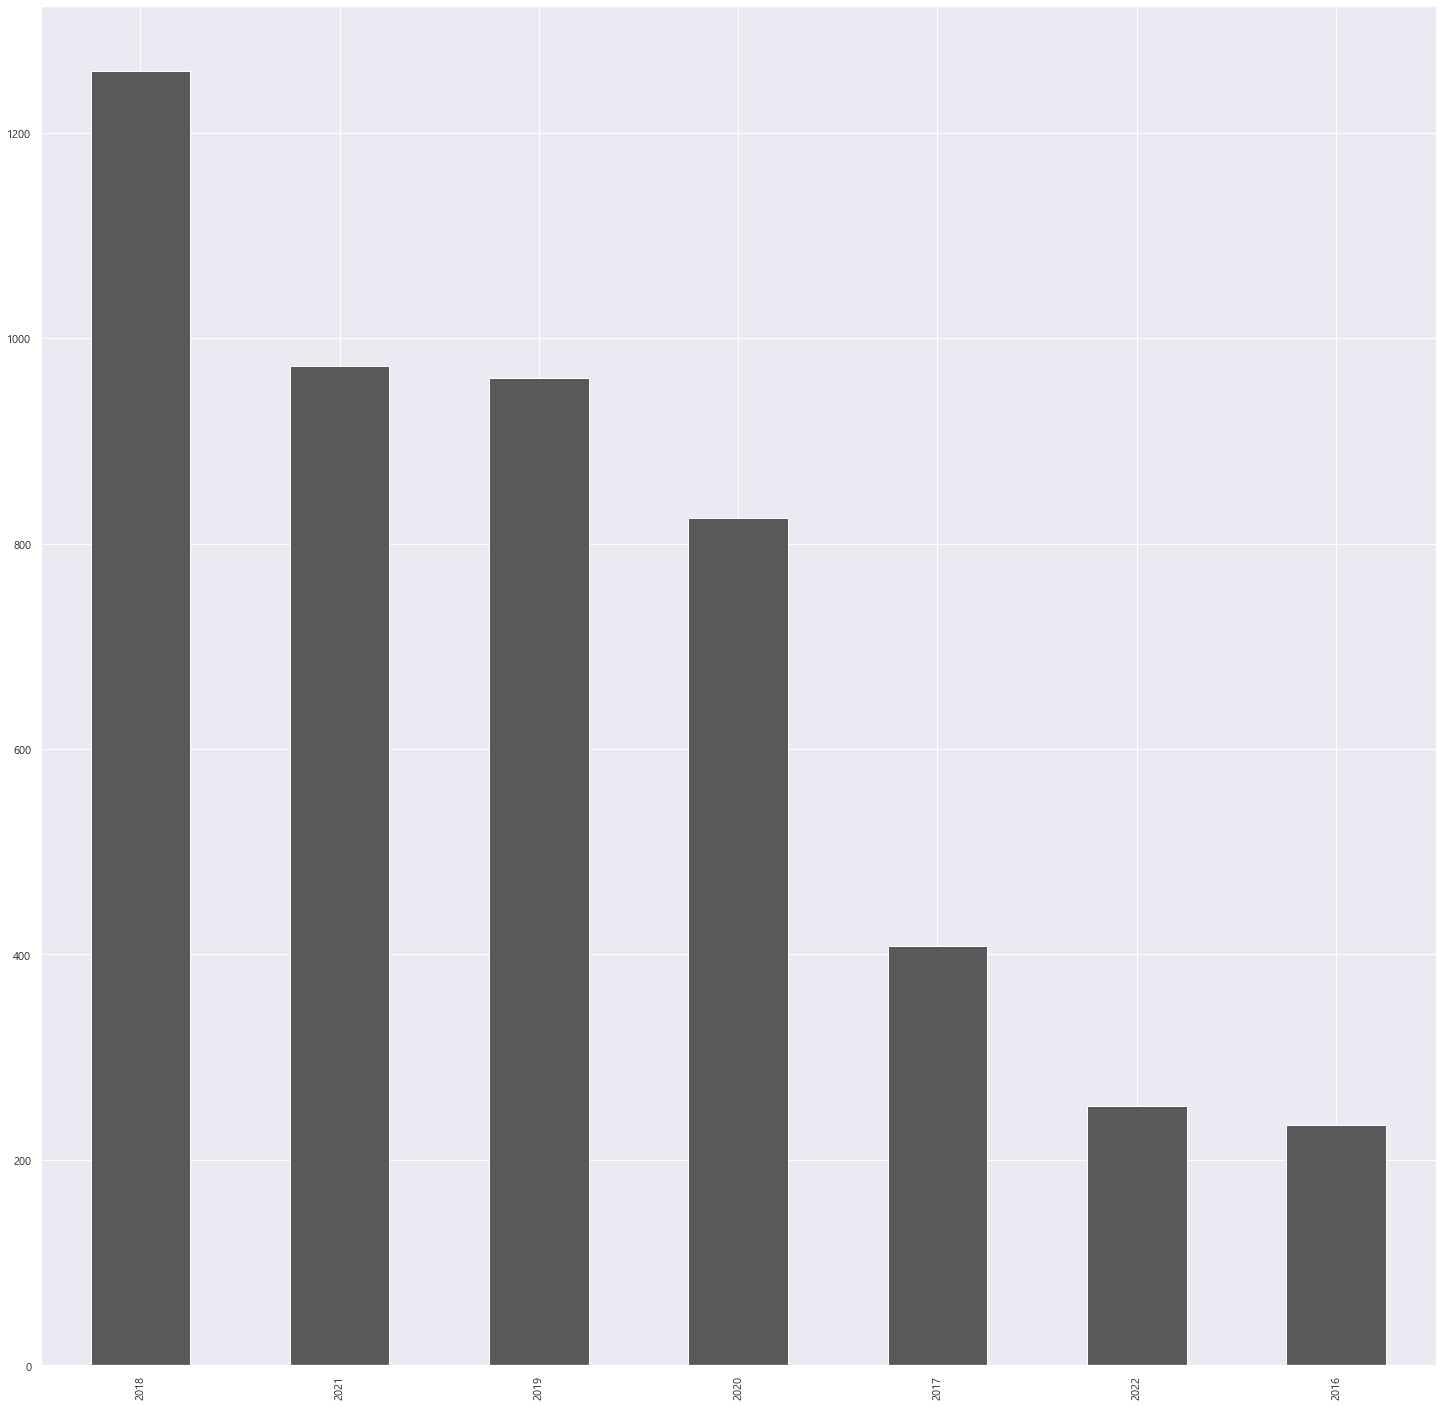

In [141]:
df_jeju[df_jeju.조회수 != '조회수없음'].년별.value_counts().plot.bar(color='#595959')

<AxesSubplot:xlabel='년별'>

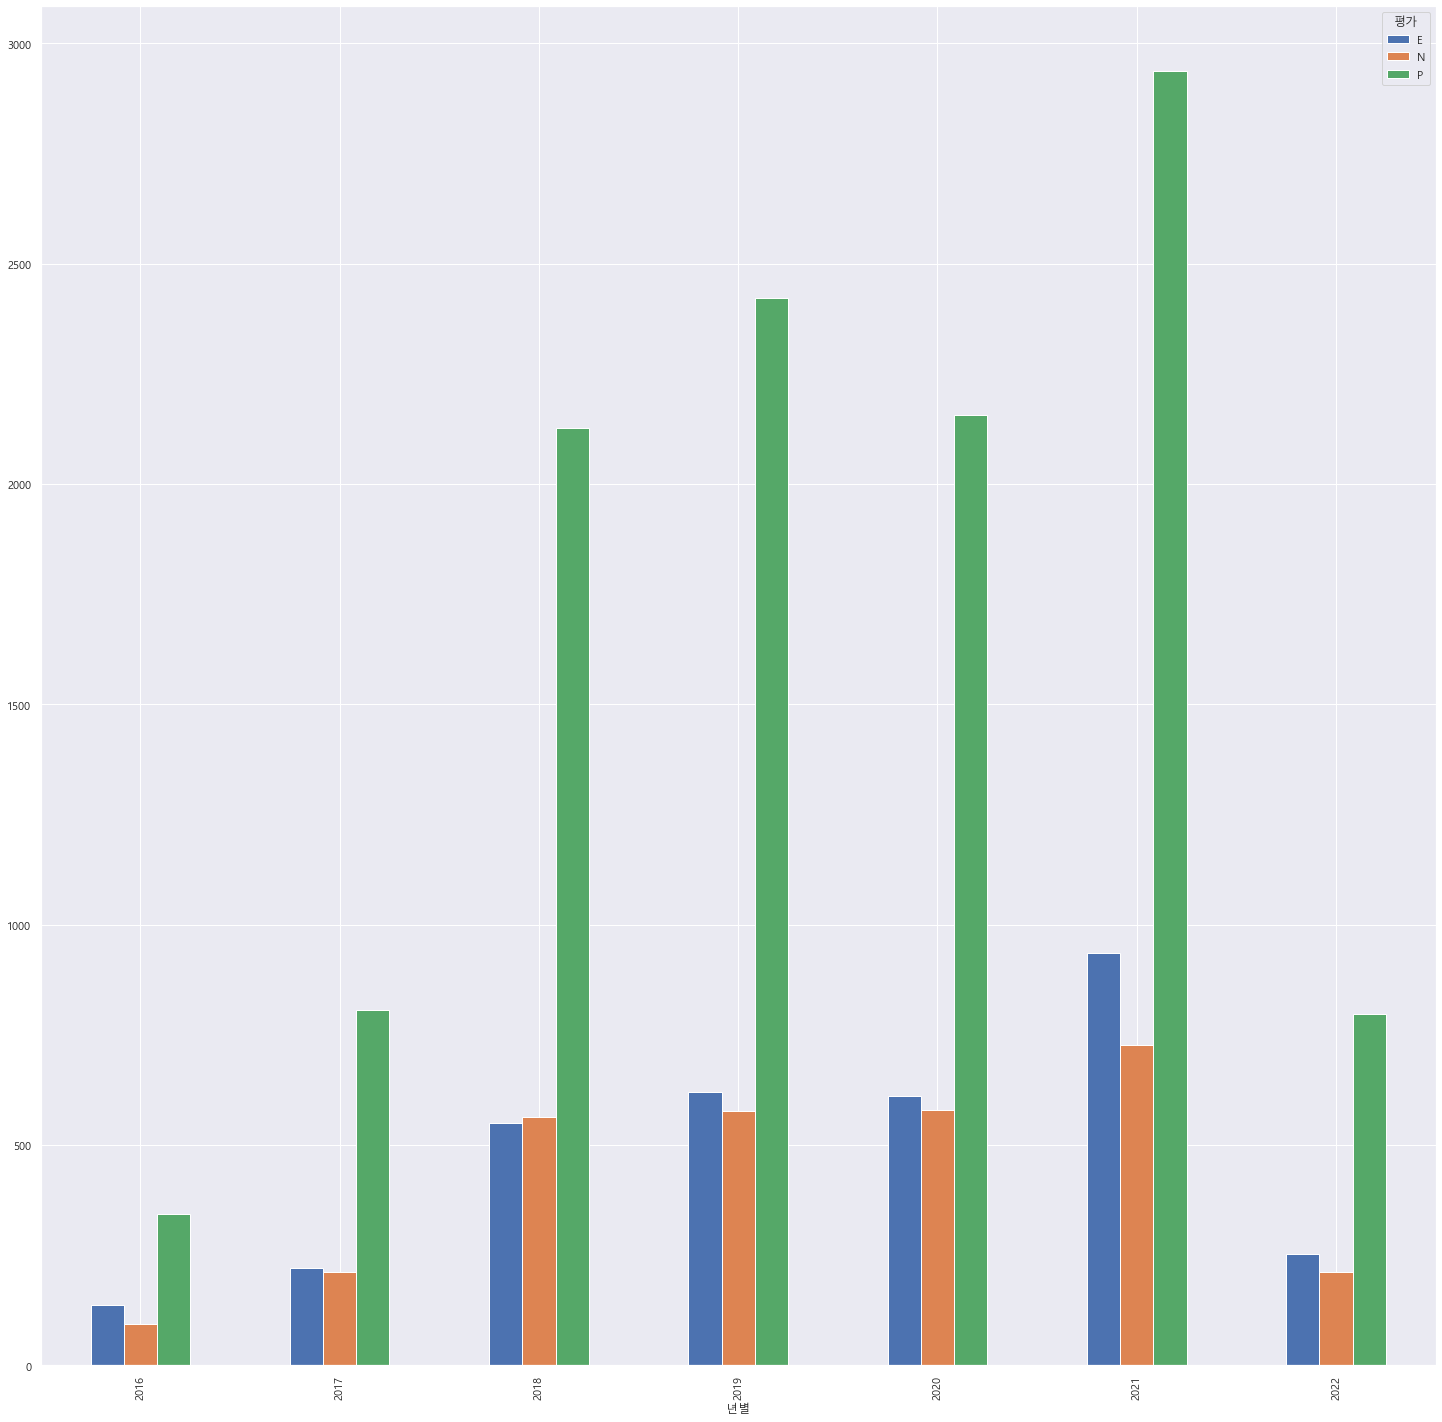

In [152]:
df_jeju.groupby([df_jeju.년별,df_jeju.평가]).제목.count().unstack().plot.bar()

## 전기차뉴스

<AxesSubplot:xlabel='년'>

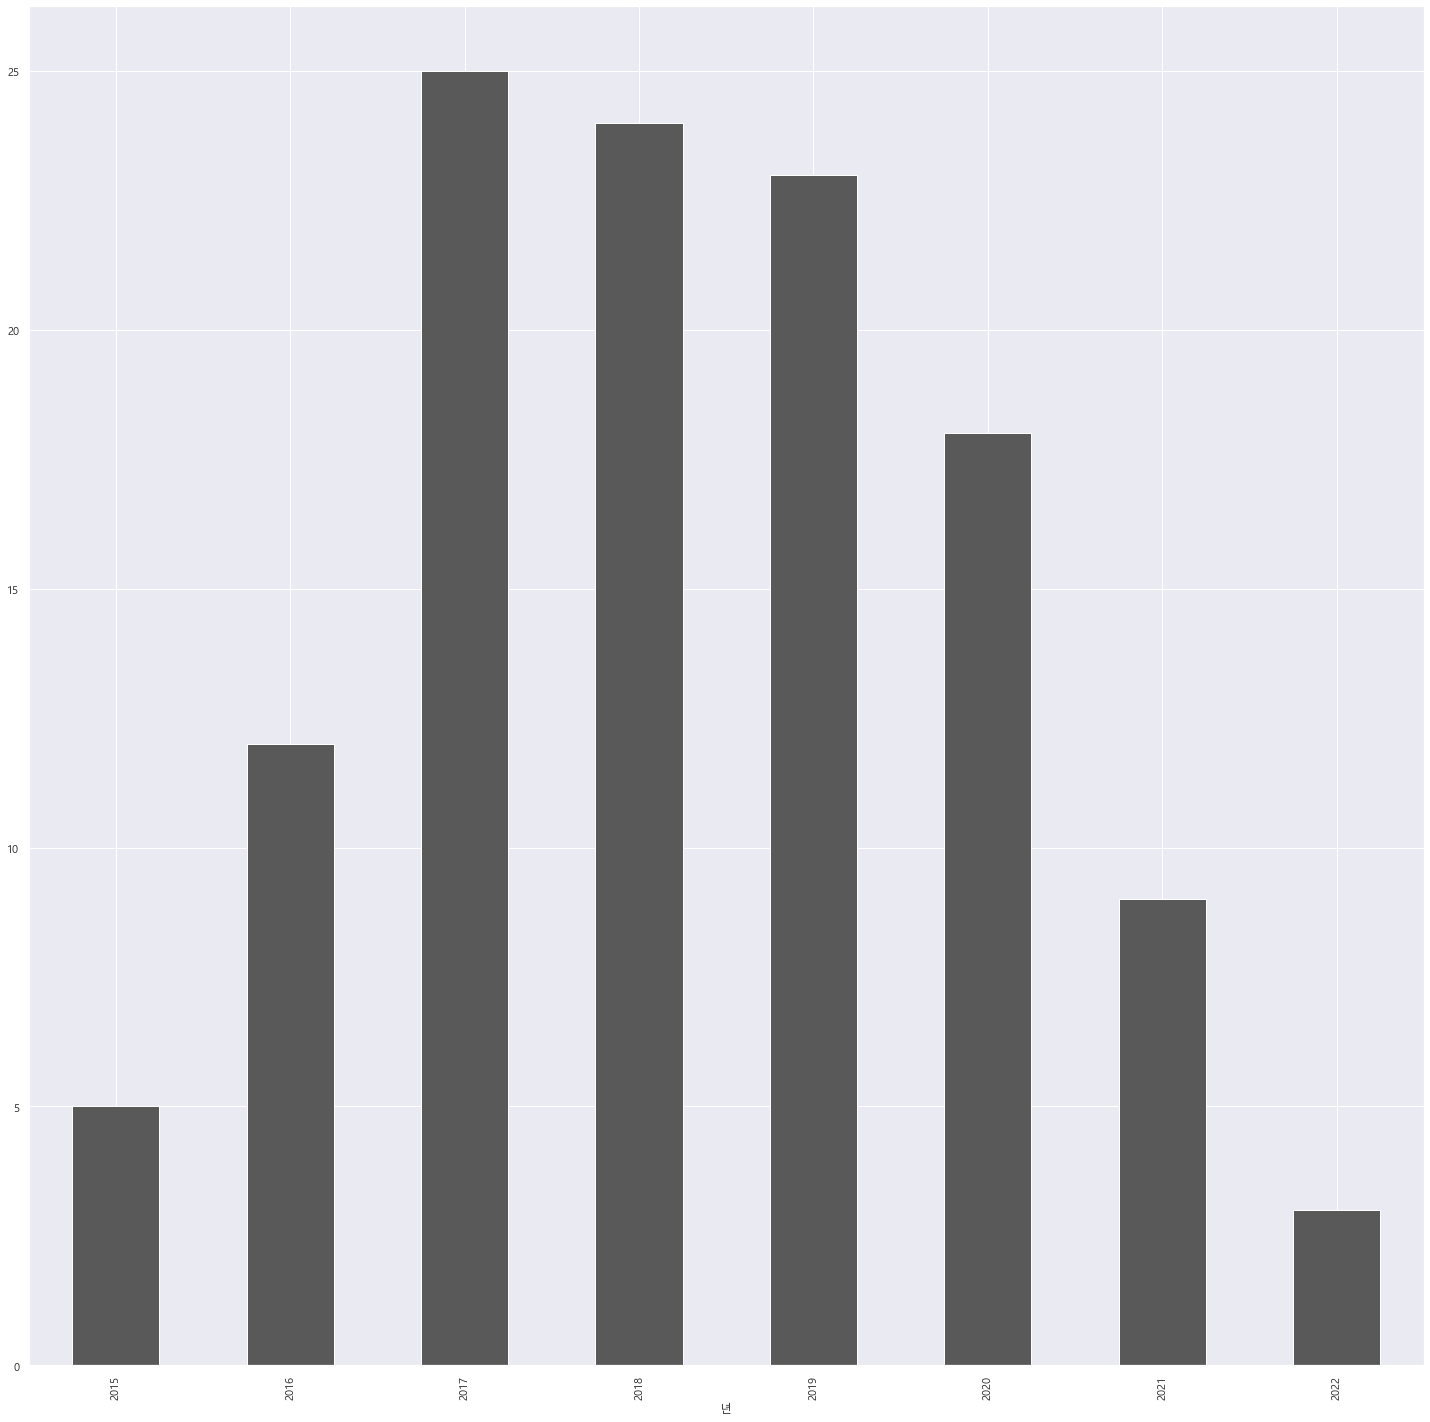

In [163]:
df_news.groupby(['년']).제목.count().plot.bar(color=('#595959'))

In [162]:
df_news.head(2)

,제목,날짜,월,년
0,"2022년, 바람으로 달리는 전기차 3만대 시대 열린다",2022-02-09,2,2022
1,"<2월 2일 0시 이후 보도 가능>전기차 보급확산 정책, ‘2022년 고용영향평가제...",2022-01-28,1,2022


In [189]:
df.reset_index(drop=True,inplace=True)

In [198]:
for i  in  range(55,75):
    print(f'{df.내용[i]}=\n{df.평가[i]}\n')

 숙소명   도라미휴양펜션 형태   관광휴양펜션 사업자등록번호   주소   제주 서귀포시 일주동로 신효동              제주 서귀포시 신효동  문의전화    평수   임대인원   객실수룸구조   기본시설평수임대인원기준최대객실수룸구조기본시설원룸평형원룸룸평형침실 거실화장실투룸평형침실 한실 거실화장실 예약가능기간  년중무휴 객실요금단기  보증금박일   보증금박일  보증금박일  보증금원룸만원없음만없음만없음만없음룸주중 만없음주말금토만없음만없음만없음만없음투룸주중 만없음주말금토만없음만없음만없음만없음 계약서 작성여부  계약서 없음 주변 관광지  쇠소깍 정방폭포 천지연폭포 새연교 황우지해변 올레길  코스휴애리 자연생활공원 치유의 숲길 한라산 둘레길 성판악 우리 숙소 소개   귀포시내 중심가에 위치한 저희 도라미펜션은 동으로는 쇠소깍차량분 표선민속촌차량분 성산일출봉차량 분 서로는 정방폭포차량분 서귀포 올레시장 천지연폭포 새연교차량분 외돌개차량분 북으로는 돈내코 유원지 상효원 식물원차량 분 휴애리 자연공원차량 분 한라산 등반로인 성판악차량 분등유명 관광지가 인근에 자리하고 있으며 차량 분이내에 마트 유명 맛집등이 있으며서귀포 축구 공원도보 분등이 있어 간단한 운동도 할수 있는 최적의 장소 입니다=
P

제주는 어딜가도 바다근처를 지날일이 많아서 언더코팅을 해야하나 고민중입니다요즘 나오는 차들은 기본적으로 코팅이 되어서 나온다고는 하는데 걱정이네요 제주시에 언더코팅 야매로 안하고 깔끔하게 잘해주는 업체 있나요=
N

딜러 매입가보다 좀 더 드리겠습니다연락주세요=
E

안녕하세요 믿을수 있는 중고차 찾으시나요후기로 증명하는 제주 등딜러 제주중고차특파원이 있습니다 제주 유일 중고차 유튜버로서 최선을 다해서 성실하게 일하고 있습니다르노삼성   전기차 연식년형식주행거리등급사고무사고연료전기변속기오토배터리보증기간년만이내회충전주행거리약압류저당체납 없음구입문의 찾으시는 매물이 아니 시더라도톡상담 하세요 원하시는 매물 찾아 드립니다 판매자 정보 소속상사  제주중고차매매상사 소속조합  제주